In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# 前処理とスケール変換

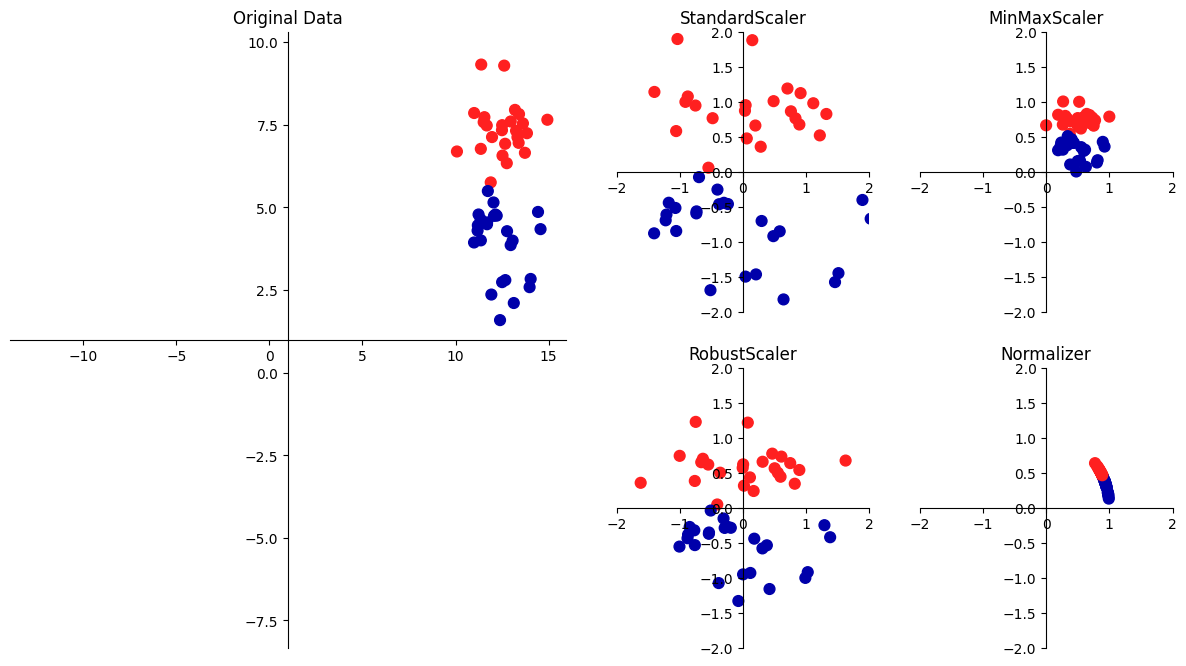

In [2]:
# 特徴量ごとにスケールを変更してずらす
mglearn.plots.plot_scaling()

- StandardScaler: 個々の特徴量が、平均0、分散1となるように変換（一般的には標準化/Standardizationという）
    - $z_i = \frac{x_i - \mu}{\sigma}$
    - $\mu = \frac{1}{n}\sum_{i=1}^nx_i = \bar{x}$
    - $\sigma = \sqrt{\sigma^2}$
    - $V = \sigma^2 = \frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2$
- RobustScaler: 個々の特徴量を、四分位数（Quartile）用いて変換する。外れ値（outlier）を無視する
    - $z_i = \frac{x - Q_2}{Q_3 - Q1}$, $Q1$:第1四分位数(全体の25%がこの値より小さい), $Q2$:第2四分位数(全体の50%がこの値より小さい)＝中央値, $Q3$:第3四分位数(全体の75%がこの値より小さい)
- MinMaxScaler: データがちょうど0から1の間に入るように変換する（一般的には正規化/Normalizationという）
    - $z_i = \frac{x_i - min(x)}{max(x) - min(x)}$
- Normalizer: 個々の特徴量を、特徴ベクトルがユークリッド長1になるように変換する。特徴ベクトルの長さ（大きさ）ではなく、方向（角度）だけが問題になる場合に用いる。
    - $z_i = \frac{x_i}{norm(x_i)}$, $norm(x)$は$L1$ノルムまたは$L2$ノルム

In [3]:
# データ変換を適用して教師あり学習を行う
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
# 前処理のためにスケール変換器を適合（学習）させる
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [5]:
# 前処理を適用する
# データを変換
X_train_scaled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_165/1082742204.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
/tmp/ipykernel_165/1082742204.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
/tmp/ipykernel_165/1082742204.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will h

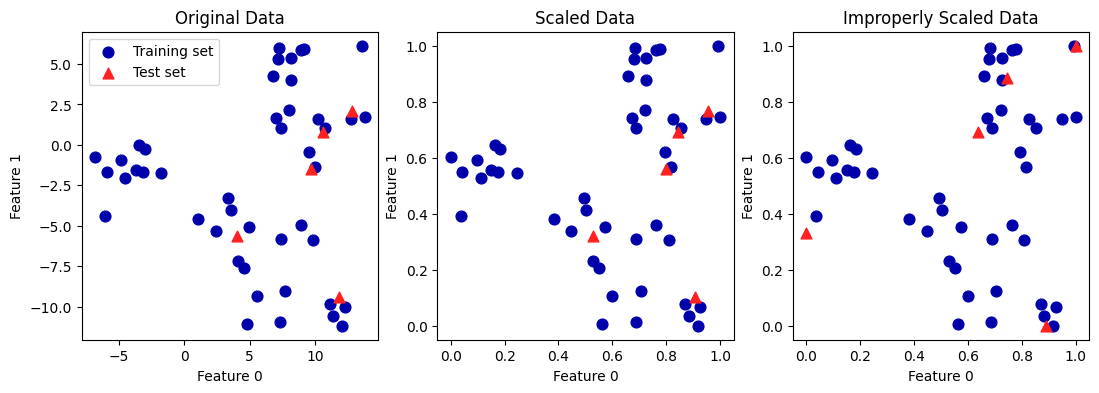

In [6]:
# 訓練データとテストデータを同じように変換する
from sklearn.datasets import make_blobs
# 合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0,1になる。ここでは説明のためにわざとやっている
# *実際にやってはいけない！*
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [7]:
# 効率の良いショートカット
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=1000000, centers=5, random_state=4, cluster_std=2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitとtransformを続けて呼ぶ（メソッドチェーンを使って）
%time X_scaled = scaler.fit(X).transform(X)
# 同じ結果になるがより効率的に計算される
%time X_scaled_d = scaler.fit_transform(X)

CPU times: user 81.1 ms, sys: 705 µs, total: 81.8 ms
Wall time: 81.8 ms
CPU times: user 80.8 ms, sys: 504 µs, total: 81.3 ms
Wall time: 81.2 ms


- "%time"でその行の実行時間を計測できる
- "%timeit"でその行を複数回実行したときの時間を計測できる

## 教師あり学習における前処理の効果

In [8]:
# cancerデータセットをスケール変換して学習させる
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

# ガンマの値を書籍の当時の実装に変更（2.3.7参照）
# ガンマの初期値は"1 / (n_features * X_train.var())"
n_features = X_train.shape[1]
gamma = 1 / n_features

svm = SVC(C=100, gamma=gamma)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [9]:
# cancerデータセットを、0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [10]:
# cancerデータセットを、平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## データの白色化
- 参考：https://panda-clip.com/pca-white/

(569, 2)


Text(0, 0.5, 'mean perimeter')

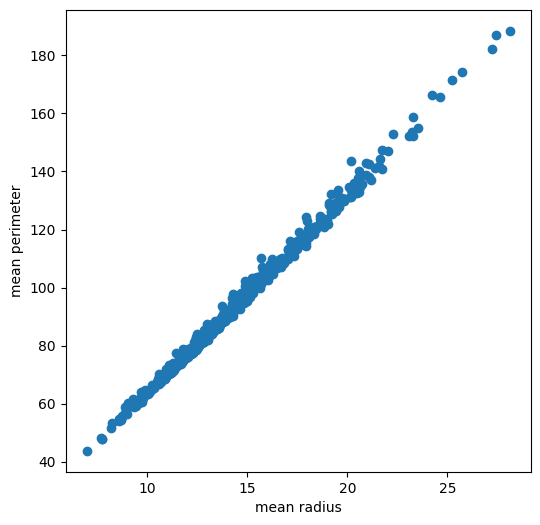

In [11]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd

#乳がんデータ
panda_box = load_breast_cancer()

#グラフに描いてみる
b_data = panda_box.data[:,[0,2]]
print(b_data.shape)

#matplotlibでのグラフ描画
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.scatter(b_data[:, 0],b_data[:, 1])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean perimeter")

In [12]:
#相関係数を求めるための準備
def change_series(data_list):
  reshaped_data = data_list.reshape(1,-1)
  series = pd.Series(reshaped_data[0])
  return series

series1 = change_series(panda_box.data[:, [0]])
#print(series1)

series2 = change_series(panda_box.data[:, [2]])
#print(series2)

#相関係数を求める
soukan = series1.corr(series2)
print("相関係数")
print(soukan)

相関係数
0.9978552814938105


Text(0, 0.5, 'pca_feature2')

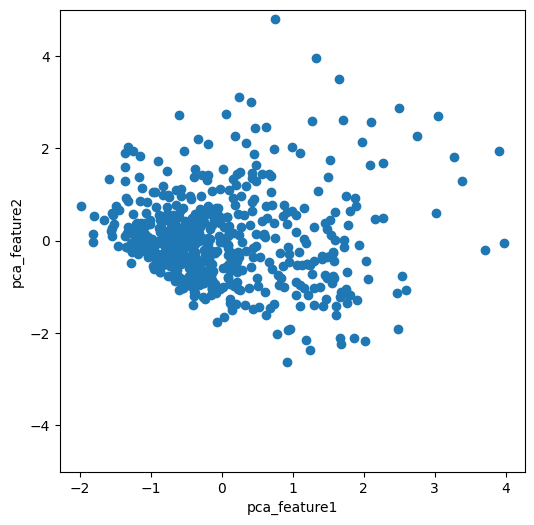

In [13]:
# 白色化を行う
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
pca.fit(b_data)

#pca白色化された特徴量
pca_data = pca.transform(b_data)

#matplotlibにてグラフの表示
fig2 = plt.figure(figsize = (6, 6))
ax2 = fig2.add_subplot(111)

ax2.scatter(pca_data[:, 0],pca_data[:, 1])
ax2.set_ylim(-5,5)
ax2.set_xlabel("pca_feature1")
ax2.set_ylabel("pca_feature2")

In [14]:
# 白色化後の相関係数を求める
pca_series1 = change_series(pca_data[:, [0]])
pca_series2 = change_series(pca_data[:, [1]])

#相関係数を求める
pca_soukan = pca_series1.corr(pca_series2)
print("PCA白色化後の相関係数")
print(pca_soukan)

PCA白色化後の相関係数
4.289555799765409e-15
